In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Impporting training data
train_path = "C:\\Users\\Pranay Singhal\\Desktop\\neo internship\\train.csv" 
data_train = pd.read_csv(train_path)

In [3]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 9 columns):
vidid        14999 non-null object
adview       14999 non-null int64
views        14999 non-null object
likes        14999 non-null object
dislikes     14999 non-null object
comment      14999 non-null object
published    14999 non-null object
duration     14999 non-null object
category     14999 non-null object
dtypes: int64(1), object(8)
memory usage: 1.0+ MB


In [4]:
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,F
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,D
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,C
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,H
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,D


In [5]:
data_train.shape

(14999, 9)

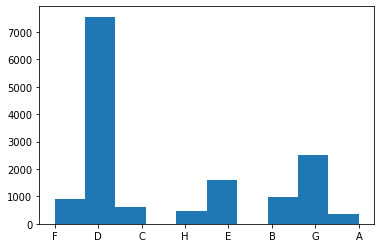

In [6]:
# Visualization of training data
# Individual Plots
plt.hist(data_train["category"])
plt.show()

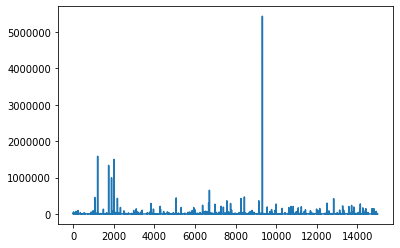

In [7]:
plt.plot(data_train["adview"])
plt.show()

In [8]:
# Remove videos with adview greater than 2000000 as outlier
data_train = data_train[data_train["adview"] <2000000]

In [9]:
# Removing character "F" present in training data
data_train=data_train[data_train.views!='F']
data_train=data_train[data_train.likes!='F']
data_train=data_train[data_train.dislikes!='F']
data_train=data_train[data_train.comment!='F']
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,F
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,D
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,C
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,H
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,D


In [10]:
# Assigning each category a number for Category feature of training data
category={'A': 1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8}
data_train["category"]=data_train["category"].map(category)
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,6
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,4
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,3
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,8
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,4


In [11]:
# Convert values to integers for views, likes, comments, dislikes and adview of training data
data_train["views"] = pd.to_numeric(data_train["views"])
data_train["comment"] = pd.to_numeric(data_train["comment"])
data_train["likes"] = pd.to_numeric(data_train["likes"])
data_train["dislikes"] = pd.to_numeric(data_train["dislikes"])
data_train["adview"]=pd.to_numeric(data_train["adview"])
column_vidid=data_train['vidid']

In [12]:
# Endoding features like Category, Duration, Vidid of training data
from sklearn.preprocessing import LabelEncoder
data_train['duration']=LabelEncoder().fit_transform(data_train['duration'])
data_train['vidid']=LabelEncoder().fit_transform(data_train['vidid'])
data_train['published']=LabelEncoder().fit_transform(data_train['published'])
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,2925,6
1,2741,2,1707,56,2,6,2185,3040,4
2,8138,1,2023,25,0,2,2094,1863,3
3,9004,6,620860,777,161,153,2119,2546,8
4,122,1,666,1,0,0,2091,1963,4


In [13]:
# Convert Time_in_sec for duration of training data
import datetime
import time
def checki(x):
    y = x[2:]
    h = ''
    m = ''
    s = ''
    mm = ''
    P = ['H','M','S']
    for i in y:
        if i not in P:
            mm+=i
        else:
            if(i=="H"):
                h = mm
                mm = ''
            elif(i == "M"):
                m = mm
                mm = ''
            else:
                s = mm
                mm = ''
    if(h==''):
        h = '00'
    if(m == ''):
        m = '00'
    if(s==''):
        s='00'
    bp = h+':'+m+':'+s
    return bp

In [14]:
mp = pd.read_csv("C:\\Users\\Pranay Singhal\\Desktop\\neo internship\\train.csv")["duration"]
time = mp.apply(checki)

In [15]:
def func_sec(time_string):
    h, m, s = time_string.split(':')
    return int(h) * 3600 + int(m) * 60 + int(s)

In [16]:
data_train["duration"]=time.apply(func_sec)
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,457,6
1,2741,2,1707,56,2,6,2185,570,4
2,8138,1,2023,25,0,2,2094,136,3
3,9004,6,620860,777,161,153,2119,262,8
4,122,1,666,1,0,0,2091,31,4


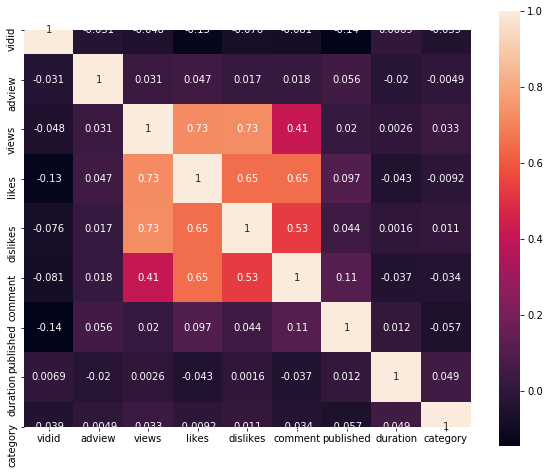

In [17]:
# Heatmap 
import seaborn as sns
f, ax = plt.subplots(figsize=(10, 8))
corr = data_train.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=None, square=True, ax=ax,annot=True)
plt.show()

In [18]:
# Spliting training Data 
Y_train = pd.DataFrame(data = data_train.iloc[:, 1].values, columns = ['target'])
data_train=data_train.drop(["adview"],axis=1)
data_train=data_train.drop(["vidid"],axis=1)
data_train.head()

,views,likes,dislikes,comment,published,duration,category
0,1031602,8523,363,1095,2168,457,6
1,1707,56,2,6,2185,570,4
2,2023,25,0,2,2094,136,3
3,620860,777,161,153,2119,262,8
4,666,1,0,0,2091,31,4


In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_train, Y_train, test_size=0.2, random_state=42)
X_train.shape

(11708, 7)

In [20]:
# Normalising training Data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)
X_train.mean()

0.1739096800320488

In [21]:
# Evaluation Metrics
from sklearn import metrics
def print_error(X_test, y_test, model_name):
    prediction = model_name.predict(X_test)
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, prediction))
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, prediction))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

In [22]:
# Linear Regression
from sklearn import linear_model
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X_train, y_train)
print_error(X_test,y_test, linear_regression)

Mean Absolute Error: 3707.3780058245347
Mean Squared Error: 835663131.1210337
Root Mean Squared Error: 28907.83857573986


In [23]:
# Support Vector Regressor
from sklearn.svm import SVR
supportvector_regressor = SVR(gamma = 'auto')
supportvector_regressor.fit(X_train,y_train.values.ravel())
print_error(X_test,y_test, supportvector_regressor)

Mean Absolute Error: 1697.0119703122805
Mean Squared Error: 833686973.2516664
Root Mean Squared Error: 28873.638032843497


In [24]:
# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train, y_train)
print_error(X_test,y_test, decision_tree)

Mean Absolute Error: 2609.6362704918033
Mean Squared Error: 886643218.4887295
Root Mean Squared Error: 29776.55484586371


In [25]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
n_estimators = 200
max_depth = 25
min_samples_split=15
min_samples_leaf=2
random_forest = RandomForestRegressor(n_estimators = n_estimators, 
                                      max_depth = max_depth, 
                                      min_samples_split=min_samples_split,
                                      min_samples_leaf=min_samples_leaf,
                                      random_state = 42)
random_forest.fit(X_train,y_train.values.ravel())
print_error(X_test,y_test, random_forest)

Mean Absolute Error: 3416.0874288727396
Mean Squared Error: 713372984.2073203
Root Mean Squared Error: 26709.04311665471


In [26]:
# Artificial Neural Network
import keras
from keras.layers import Dense
ann = keras.models.Sequential([
Dense(6, activation="relu",
input_shape=X_train.shape[1:]),
Dense(6,activation="relu"),
Dense(1)
])

Using TensorFlow backend.


In [27]:
optimizer=keras.optimizers.Adam()
loss=keras.losses.mean_squared_error
ann.compile(optimizer=optimizer,loss=loss,metrics=["mean_squared_error"])
history=ann.fit(X_train,y_train,epochs=100)

Epoch 1/100
11708/11708 [==============================] - 1s 66us/step - loss: 767407207.0938 - mean_squared_error: 767406976.0000
Epoch 2/100
11708/11708 [==============================] - 0s 27us/step - loss: 767404239.8668 - mean_squared_error: 767404096.0000
Epoch 3/100
11708/11708 [==============================] - 0s 26us/step - loss: 767397897.5307 - mean_squared_error: 767397824.0000
Epoch 4/100
11708/11708 [==============================] - 0s 26us/step - loss: 767387315.8524 - mean_squared_error: 767387008.0000
Epoch 5/100
11708/11708 [==============================] - 0s 26us/step - loss: 767369386.7491 - mean_squared_error: 767369216.0000
Epoch 6/100
11708/11708 [==============================] - ETA: 0s - loss: 761221443.5472 - mean_squared_error: 761221696.00 - 0s 25us/step - loss: 767343186.4091 - mean_squared_error: 767343424.0000
Epoch 7/100
11708/11708 [==============================] - 0s 25us/step - loss: 767309638.2492 - mean_squared_error: 767309632.0000
Epoch 8/

In [28]:
ann.summary()
print_error(X_test,y_test,ann)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 6)                 48        
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 97
Trainable params: 97
Non-trainable params: 0
_________________________________________________________________
Mean Absolute Error: 3298.8587625013674
Mean Squared Error: 830089773.1756495
Root Mean Squared Error: 28811.278575857224


In [29]:
#Saving Scikitlearn models
import joblib
joblib.dump(decision_tree, "decisiontree_youtubeadview.pkl")

['decisiontree_youtubeadview.pkl']

In [30]:
#Saving Scikitlearn models
import joblib
joblib.dump(supportvector_regressor, "supportvector_regression_youtubeadview.pkl")

['supportvector_regression_youtubeadview.pkl']

In [31]:
# Importing test data
test_path = "C:\\Users\\Pranay Singhal\\Desktop\\neo internship\\test.csv" 
data_test = pd.read_csv(test_path)

In [32]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8764 entries, 0 to 8763
Data columns (total 8 columns):
vidid        8764 non-null object
views        8764 non-null object
likes        8764 non-null object
dislikes     8764 non-null object
comment      8764 non-null object
published    8764 non-null object
duration     8764 non-null object
category     8764 non-null object
dtypes: object(8)
memory usage: 547.9+ KB


In [33]:
data_test.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2017-02-18,PT7M29S,B
1,VID_18629,1040132,8171,340,1047,2016-06-28,PT6M29S,F
2,VID_13967,28534,31,11,1,2014-03-10,PT37M54S,D
3,VID_19442,1316715,2284,250,274,2010-06-05,PT9M55S,G
4,VID_770,1893173,2519,225,116,2016-09-03,PT3M8S,B


In [34]:
data_test.describe()

,vidid,views,likes,dislikes,comment,published,duration,category
count,8764,8764,8764,8764,8764,8764,8764,8764
unique,8764,8605,3434,1215,1556,2109,2330,8
top,VID_12260,36679,2,0,0,2016-08-26,PT31S,D
freq,1,3,89,662,727,32,120,4419


In [35]:
data_test.shape

(8764, 8)

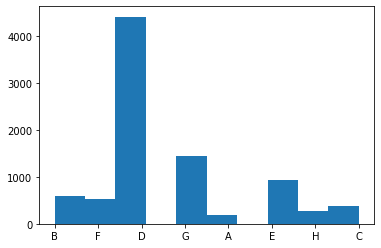

In [36]:
# Visualization of test data
# Individual Plots 
plt.hist(data_test["category"])
plt.show()

In [37]:
# Removing character "F" present in test data  
data_test=data_test[data_test.views!='F']
data_test=data_test[data_test.likes!='F']
data_test=data_test[data_test.dislikes!='F']
data_test=data_test[data_test.comment!='F']
data_test.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2017-02-18,PT7M29S,B
1,VID_18629,1040132,8171,340,1047,2016-06-28,PT6M29S,F
2,VID_13967,28534,31,11,1,2014-03-10,PT37M54S,D
3,VID_19442,1316715,2284,250,274,2010-06-05,PT9M55S,G
4,VID_770,1893173,2519,225,116,2016-09-03,PT3M8S,B


In [38]:
# Assigning each category a number for Category feature in test data
category={'A': 1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8}
data_test["category"]=data_test["category"].map(category)
data_test.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2017-02-18,PT7M29S,2
1,VID_18629,1040132,8171,340,1047,2016-06-28,PT6M29S,6
2,VID_13967,28534,31,11,1,2014-03-10,PT37M54S,4
3,VID_19442,1316715,2284,250,274,2010-06-05,PT9M55S,7
4,VID_770,1893173,2519,225,116,2016-09-03,PT3M8S,2


In [39]:
# Convert values to integers for views, likes, comments and dislikes in test data
data_test["views"] = pd.to_numeric(data_test["views"])
data_test["comment"] = pd.to_numeric(data_test["comment"])
data_test["likes"] = pd.to_numeric(data_test["likes"])
data_test["dislikes"] = pd.to_numeric(data_test["dislikes"])
data_test=data_test.drop(["vidid"],axis=1)

In [40]:
# Endoding features like Category and Duration in test data
from sklearn.preprocessing import LabelEncoder
data_test['duration']=LabelEncoder().fit_transform(data_test['duration'])
data_test['published']=LabelEncoder().fit_transform(data_test['published'])
data_test.head()

,views,likes,dislikes,comment,published,duration,category
0,440238,6153,218,1377,2053,2115,2
1,1040132,8171,340,1047,1825,2055,6
2,28534,31,11,1,1009,1506,4
3,1316715,2284,250,274,116,2265,7
4,1893173,2519,225,116,1892,1625,2


In [41]:
# Convert Time_in_sec for duration in test data
import datetime
import time
def checki(x):
    y = x[2:]
    h = ''
    m = ''
    s = ''
    mm = ''
    P = ['H','M','S']
    for i in y:
        if i not in P:
            mm+=i
        else:
            if(i=="H"):
                h = mm
                mm = ''
            elif(i == "M"):
                m = mm
                mm = ''
            else:
                s = mm
                mm = ''
    if(h==''):
        h = '00'
    if(m == ''):
        m = '00'
    if(s==''):
        s='00'
    bp = h+':'+m+':'+s
    return bp


In [42]:
mp = pd.read_csv("C:\\Users\\Pranay Singhal\\Desktop\\neo internship\\test.csv")["duration"]
time = mp.apply(checki)

In [43]:
def func_sec(time_string):
    h, m, s = time_string.split(':')
    return int(h) * 3600 + int(m) * 60 + int(s)

In [44]:
data_test["duration"]=time.apply(func_sec)
data_test.head()

,views,likes,dislikes,comment,published,duration,category
0,440238,6153,218,1377,2053,449,2
1,1040132,8171,340,1047,1825,389,6
2,28534,31,11,1,1009,2274,4
3,1316715,2284,250,274,116,595,7
4,1893173,2519,225,116,1892,188,2


In [45]:
# Normalising Test Data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_test=scaler.fit_transform(data_test)
data_test.mean()

0.16965883079102045

In [46]:
# Implementing Decision tree Regression Model on test data
import joblib
decision_tree_pred = joblib.load("decisiontree_youtubeadview.pkl").predict(data_test)
decision_tree_pred

array([ 4., 21.,  1., ..., 13.,  2., 18.])

In [47]:
# Implementing Support Vector Regression Model on test data
svr = joblib.load("supportvector_regression_youtubeadview.pkl")
svr_pred = svr.predict(data_test)
svr_pred

array([2.10231656, 2.19279737, 1.94175174, ..., 2.21085983, 1.96861381,
       1.83944074])

In [57]:
# Saving the Predictions

# Loading test data to save prediction
test_path = 'C:\\Users\\Pranay Singhal\\Desktop\\neo internship\\test.csv'
data_pred = pd.read_csv(test_path)
data_pred.head()


,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2017-02-18,PT7M29S,B
1,VID_18629,1040132,8171,340,1047,2016-06-28,PT6M29S,F
2,VID_13967,28534,31,11,1,2014-03-10,PT37M54S,D
3,VID_19442,1316715,2284,250,274,2010-06-05,PT9M55S,G
4,VID_770,1893173,2519,225,116,2016-09-03,PT3M8S,B


In [58]:
# Removing character "F" present in data
data_pred=data_pred[data_pred.views!='F']
data_pred=data_pred[data_pred.likes!='F']
data_pred=data_pred[data_pred.dislikes!='F']
data_pred=data_pred[data_pred.comment!='F']
data_pred.shape

(8549, 8)

In [59]:
# Converting the data to DataFrame
df_pred = pd.DataFrame(data_pred)
df_pred.shape

(8549, 8)

In [62]:
# Appending the predicted adviews
df_pred['predicted adviews'] =  decision_tree_pred
df_pred.head()

,vidid,views,likes,dislikes,comment,published,duration,category,predicted adviews
0,VID_1054,440238,6153,218,1377,2017-02-18,PT7M29S,B,4.0
1,VID_18629,1040132,8171,340,1047,2016-06-28,PT6M29S,F,21.0
2,VID_13967,28534,31,11,1,2014-03-10,PT37M54S,D,1.0
3,VID_19442,1316715,2284,250,274,2010-06-05,PT9M55S,G,6.0
4,VID_770,1893173,2519,225,116,2016-09-03,PT3M8S,B,67985.0


In [64]:
# Saving the file
prediction_df = df_pred.to_csv("C:\\Users\\Pranay Singhal\\Desktop\\predictions.csv")